# Trabalho Grafos 02

# instalação de  bibliotecas com pip

In [ ]:

%pip install networkx
%pip install matplotlib
%pip install scipy
%pip install pandas

#biblioteca Spotyfy

# Visualiza Grafo Estrelas

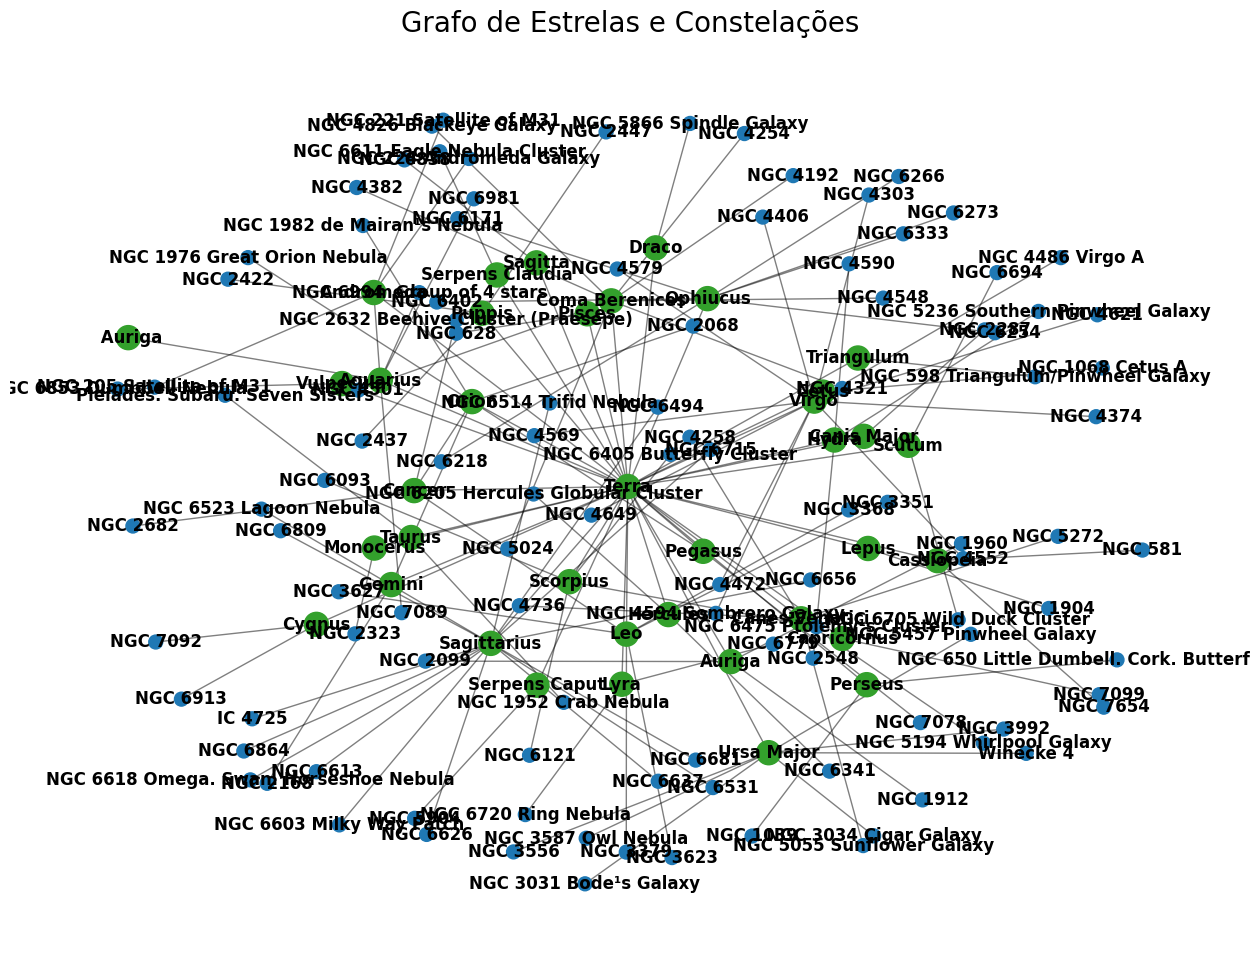

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Carregar o CSV
df = pd.read_csv('Grafo2_stars.csv')

# Criar um grafo não direcionado
G = nx.Graph()

# Adicionar nós e arestas ao grafo com base nos dados do CSV
for _, row in df.iterrows():
    star_name = row['Name']
    constellation_name = row['Constellation']
    magnitude = row['Magnitude']
    distance_ly = row['Distance (ly)']

    G.add_node(star_name, type='star', magnitude=magnitude)
    G.add_node(constellation_name, type='constellation')
    G.add_edge(star_name, constellation_name, distance=distance_ly)

# Plotar o grafo com maior espaçamento e tamanho
layout = nx.spring_layout(G, seed=42, k=0.4)  # Layout para a visualização com maior espaçamento
node_colors = ['#1f78b4' if node[1]['type'] == 'star' else '#33a02c' for node in G.nodes(data=True)]
node_sizes = [100 if node[1]['type'] == 'star' else 300 for node in G.nodes(data=True)]

plt.figure(figsize=(16, 12))  # Aumentar o tamanho do gráfico
nx.draw_networkx_nodes(G, layout, node_color=node_colors, node_size=node_sizes)
nx.draw_networkx_edges(G, layout, alpha=0.5, width=1.0)  # Arestas transparentes
nx.draw_networkx_labels(G, layout, font_size=12, font_color='black', font_weight='bold')
plt.axis('off')
plt.title("Grafo de Estrelas e Constelações", fontsize=20)
plt.show()


# Visualiza Grafo direcionado

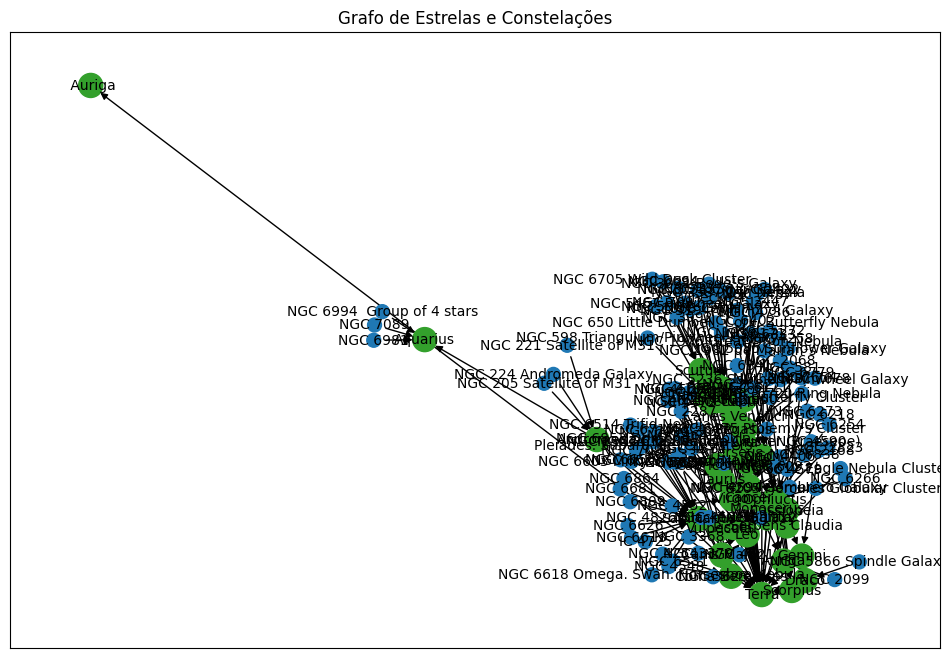

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Carregar o CSV
df = pd.read_csv('Grafo2_stars.csv')

# Criar um grafo direcionado
G = nx.DiGraph()

# Adicionar nós e arestas ao grafo com base nos dados do CSV
for _, row in df.iterrows():
    star = row['Name']
    constellation = row['Constellation']
    magnitude = row['Magnitude']
    distance = row['Distance (ly)']

    G.add_node(star, type='star', magnitude=magnitude)
    G.add_node(constellation, type='constellation')
    G.add_edge(star, constellation, distance=distance)

# Plotar o grafo
pos = nx.spring_layout(G)  # Layout para a visualização
node_colors = ['#1f78b4' if node[1]['type'] == 'star' else '#33a02c' for node in G.nodes(data=True)]
node_sizes = [100 if node[1]['type'] == 'star' else 300 for node in G.nodes(data=True)]
#edge_labels = {(star, constellation): f'Distância: {G[star][constellation]["distance"]:.2f} ly' for star, constellation in G.edges}
edge_labels={}
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, label_pos=0.3, rotate=False)
plt.axis('on')
plt.title("Grafo de Estrelas e Constelações")
plt.show()


# Busca Estrelas até uma Distância maxima e mostra o menor Distância até elas.

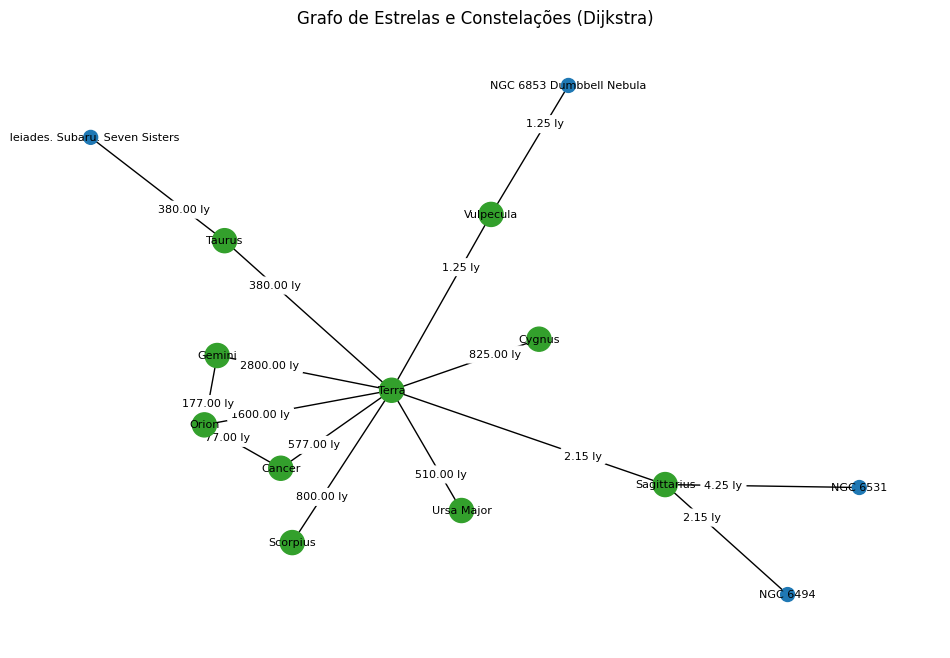

Estrelas dentro de 1000.5 anos-luz de Terra:
Cancer: 577.00 anos-luz
Orion: 654.00 anos-luz
Gemini: 831.00 anos-luz
Cygnus: 825.00 anos-luz
Sagittarius: 2.15 anos-luz
Scorpius: 800.00 anos-luz
Taurus: 380.00 anos-luz
Ursa Major: 510.00 anos-luz
Vulpecula: 1.25 anos-luz
NGC 6531: 6.40 anos-luz
NGC 6494: 4.30 anos-luz
NGC 6853 Dumbbell Nebula: 2.50 anos-luz
Pleiades. Subaru. Seven Sisters: 760.00 anos-luz


In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import heapq

# Carregar o CSV
df = pd.read_csv('Grafo2_stars.csv')

# Criar um grafo não direcionado (Dijkstra é usado em grafos não direcionados)
G = nx.Graph()

# Adicionar nós e arestas ao grafo com base nos dados do CSV
for _, row in df.iterrows():
    star = row['Name']
    constellation = row['Constellation']
    distance = row['Distance (ly)']

    G.add_node(star, type='star')
    G.add_node(constellation, type='constellation')
    G.add_edge(star, constellation, distance=distance)

# Função para encontrar todas as estrelas dentro da distância máxima usando Dijkstra
def stars_within_distance_dijkstra(graph, source, max_dist):
    reachable_stars = []

    # Inicializa um dicionário para armazenar as distâncias de cada nó a partir do nó de origem
    distance = {node: float('inf') for node in graph}
    distance[source] = 0

    # Inicializa uma fila de prioridade (heap) com a distância de origem como 0
    priority_queue = [(0, source)]

    # Algoritmo de Dijkstra para encontrar as menores distâncias a partir do nó de origem
    while priority_queue:
        dist, u = heapq.heappop(priority_queue)

        # Se a distância extraída da fila de prioridade for maior do que a distância registrada,
        # ignore este nó, pois já encontramos um caminho mais curto.
        if dist > distance[u]:
            continue

        # Verifica os vizinhos do nó atual e atualiza suas distâncias se encontrar um caminho mais curto
        for v in graph.neighbors(u):
            edge_dist = graph[u][v]['distance']
            if distance[u] + edge_dist < distance[v]:
                distance[v] = distance[u] + edge_dist

                # Adicione o nó vizinho à fila de prioridade com a nova distância
                heapq.heappush(priority_queue, (distance[v], v))

    # Após a execução do algoritmo, o dicionário 'distance' contém as menores distâncias a partir do nó de origem

    # Percorre todos os nós no grafo (exceto o nó de origem) e verifica se a distância é menor ou igual à distância máxima
    for star in graph.nodes():
        if star != source:
            if distance[star] <= max_dist:
                reachable_stars.append((star, distance[star]))

    return reachable_stars


## altere como desejar

# Solicitar a distância máxima desejada do usuário
max_distance = 1000.5

# Vértice de origem (você pode escolher qualquer vértice do grafo)
source_vertex = 'Terra'


###############################

# Encontrar todas as estrelas dentro da distância máxima usando Dijkstra
reachable_stars = stars_within_distance_dijkstra(G, source_vertex, max_distance)

# Criar um novo grafo com as estrelas encontradas
reachable_G = G.subgraph([star for star, _ in reachable_stars] + [source_vertex])

# Plotar somente as estrelas encontradas
pos = nx.spring_layout(reachable_G, k=0.3)  # Espaçamento maior
node_colors = ['#1f78b4' if node[1]['type'] == 'star' else '#33a02c' for node in reachable_G.nodes(data=True)]
node_sizes = [100 if node[1]['type'] == 'star' else 300 for node in reachable_G.nodes(data=True)]
edge_labels = {(star, constellation): f'{G[star][constellation]["distance"]:.2f} ly' for star, constellation in reachable_G.edges}
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(reachable_G, pos, node_color=node_colors, node_size=node_sizes)
nx.draw_networkx_edges(reachable_G, pos)
nx.draw_networkx_labels(reachable_G, pos, font_size=8, font_color='black')
nx.draw_networkx_edge_labels(reachable_G, pos, edge_labels=edge_labels, font_size=8, label_pos=0.3, rotate=False)
plt.axis('off')
plt.title(f"Grafo de Estrelas e Constelações (Dijkstra)")
plt.show()

print(f"Estrelas dentro de {max_distance} anos-luz de {source_vertex}:")
for star, distance in reachable_stars:
    print(f"{star}: {distance:.2f} anos-luz")


## Algoritmo de Prim : Plota grafo De estrela e Custo total da Árvore Geradora Mínima

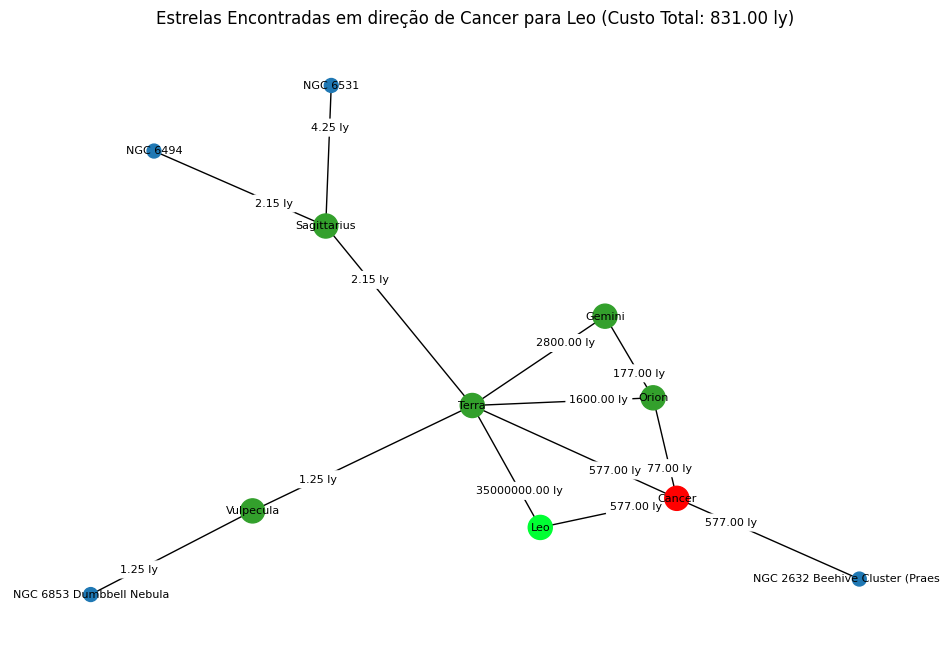

Custo total da Árvore Geradora Mínima em direção a Leo: 831.00 ly


In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import random  # Importe a biblioteca random

# Carregar o CSV
df = pd.read_csv('Grafo2_stars.csv')

# Criar um grafo não direcionado (Dijkstra é usado em grafos não direcionados)
G = nx.Graph()

# Adicionar nós e arestas ao grafo com base nos dados do CSV
for _, row in df.iterrows():
    star = row['Name']
    constellation = row['Constellation']
    distance = row['Distance (ly)']

    G.add_node(star, type='star')
    G.add_node(constellation, type='constellation')
    G.add_edge(star, constellation, distance=distance)

# Função para encontrar todas as estrelas dentro da distância máxima usando Dijkstra
def stars_within_distance_dijkstra(graph, source, max_dist):
    reachable_stars = []

    # Inicializa um dicionário para armazenar as distâncias de cada nó a partir do nó de origem
    distance = {node: float('inf') for node in graph}
    distance[source] = 0

    # Inicializa uma fila de prioridade (heap) com a distância de origem como 0
    priority_queue = [(0, source)]

    # Algoritmo de Dijkstra para encontrar as menores distâncias a partir do nó de origem
    while priority_queue:
        dist, u = heapq.heappop(priority_queue)

        # Se a distância extraída da fila de prioridade for maior do que a distância registrada,
        # ignore este nó, pois já encontramos um caminho mais curto.
        if dist > distance[u]:
            continue

        # Verifica os vizinhos do nó atual e atualiza suas distâncias se encontrar um caminho mais curto
        for v in graph.neighbors(u):
            edge_dist = graph[u][v]['distance']
            if distance[u] + edge_dist < distance[v]:
                distance[v] = distance[u] + edge_dist

                # Adicione o nó vizinho à fila de prioridade com a nova distância
                heapq.heappush(priority_queue, (distance[v], v))

    # Após a execução do algoritmo, o dicionário 'distance' contém as menores distâncias a partir do nó de origem

    # Percorre todos os nós no grafo (exceto o nó de origem) e verifica se a distância é menor ou igual à distância máxima
    for star in graph.nodes():
        if star != source:
            if distance[star] <= max_dist:
                reachable_stars.append((star, distance[star]))

    return reachable_stars

# funcao plogar o grafo
def plotar_estrelas_encontradas(grafo, estrelas, custo_total, origem, destino):
    pos = nx.spring_layout(grafo, k=0.3)  # Espaçamento maior
    node_data = dict(grafo.nodes(data=True))
    
    COLOR_RED = '#FF0000'  # Vermelho
    COLOR_GREEN = '#00FF33'  # 
    
    node_colors = [COLOR_RED if node == origem else COLOR_GREEN if node == destino else '#1f78b4' if node_data[node]['type'] == 'star' else '#33a02c' for node in grafo.nodes()]
    node_sizes = [100 if node_data[node]['type'] == 'star' else 300 for node in grafo.nodes()]
    edge_labels = {(star, constellation): f'{grafo[star][constellation]["distance"]:.2f} ly' for star, constellation in grafo.edges()}
    plt.figure(figsize=(12, 8))
    
    nx.draw_networkx_nodes(grafo, pos, node_color=node_colors, node_size=node_sizes)
    nx.draw_networkx_edges(grafo, pos)
    nx.draw_networkx_labels(grafo, pos, font_size=8, font_color='black')
    nx.draw_networkx_edge_labels(grafo, pos, edge_labels=edge_labels, font_size=8, label_pos=0.3, rotate=False)
    plt.axis('off')
    plt.title(f"Estrelas Encontradas em direção de {origem} para {destino} (Custo Total: {custo_total:.2f} ly)")
    plt.show()


# Função para encontrar a Árvore Geradora Mínima (AGM) em direção a um destino específico
def encontrar_AGM_para_destino(graph, source, destination):
    agm = nx.Graph()
    visited = set()
    priority_queue = [(0, source, None)]
    total_cost = 0

    while priority_queue:
        dist, current, parent = heapq.heappop(priority_queue)
        if current in visited:
            continue

        visited.add(current)

        if parent is not None:
            agm.add_edge(parent, current, distance=dist)
            total_cost += dist  # Atualiza o custo total

        for neighbor in graph[current]:
            if neighbor not in visited:
                edge_dist = graph[current][neighbor]['distance']
                heapq.heappush(priority_queue, (edge_dist, neighbor, current))

        # Se o destino desejado for alcançado, pare o algoritmo
        if current == destination:
            break

    return agm, total_cost



### Altere os dados como desejar

# Solicitar a distância máxima  da Busca desejada 
max_distance = 700

# Vértice de origem (você pode escolher qualquer vértice do grafo)
source_vertex = 'Cancer'
# Solicitar o vértice de destino desejado
destination_vertex = 'Leo'

#####---- 

# Encontrar todas as estrelas dentro da distância máxima usando Dijkstra
reachable_stars = stars_within_distance_dijkstra(G, source_vertex, max_distance)


# Criar um novo grafo com as estrelas encontradas
reachable_G = G.subgraph([star for star, _ in reachable_stars] + [source_vertex])

# Encontrar a Árvore Geradora Mínima em direção ao destino desejado
min_spanning_tree, total_cost = encontrar_AGM_para_destino(reachable_G, source_vertex, destination_vertex)



# Utilize a função para plotar somente as estrelas encontradas
plotar_estrelas_encontradas(reachable_G, reachable_stars, total_cost, source_vertex, destination_vertex)



# Imprimir o custo total da AGM
print(f"Custo total da Árvore Geradora Mínima em direção a {destination_vertex}: {total_cost:.2f} ly")


